# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [2]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

Note: you may need to restart the kernel to use updated packages.


# Imports

In [3]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [50]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-9-nikita/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [51]:
## Use your ML skills to get from step 1 to step 6

In [52]:
## Dropping the rows that have NAs in any of the columns

df.dropna(inplace=True)

In [53]:
## Splitting the data into train (80%) and test (20%) portions with random_state=123

train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
train_data

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,Observed,SAM0-UNICON,TaiESM1
time,,,,,,,,,,,,,,,,,,,,,
1953-10-26,17.906051,0.837579,9.753198e-14,0.018863,2.878923e-01,0.007043,1.227189e-01,1.085584e+01,0.022752,0.472927,...,6.688447e+00,2.860546e+00,9.779330e-14,2.980863e-01,1.659176e-13,3.841924e+00,2.713473,1.833044,6.594400e-01,0.129196
1921-10-22,0.515505,1.911354,1.135404e+00,0.000002,4.091981e-01,0.009669,7.420817e-02,1.239226e+00,3.566098,0.667190,...,2.368273e-01,6.528480e-01,1.132699e-13,7.653117e-08,4.560164e-03,4.178978e-02,7.909935,4.038183,2.067648e-01,2.018346
1925-01-22,0.161412,2.666091,7.012887e-02,2.040689,1.338349e+01,0.073243,2.552343e-04,1.349633e+00,0.075959,0.059223,...,1.082573e-01,2.977031e+00,1.320287e-13,1.937005e-04,1.692996e-13,1.290949e-03,0.183711,0.419818,1.733777e+00,0.932259
1902-11-21,3.651607,3.117433,1.142701e-13,0.000016,4.658142e-09,3.913076,9.442968e+00,7.203823e-01,5.314680,0.122738,...,1.635075e-01,2.131350e-02,9.901551e-01,1.142382e+00,1.840662e-03,4.955181e-02,0.000068,0.698486,1.298833e+01,0.005468
1925-02-17,0.635625,39.042773,1.084678e+00,31.690315,6.208601e-09,0.416932,7.337828e-01,4.238512e-03,0.439862,0.404930,...,4.388535e-13,2.544746e-02,2.918170e+00,1.314147e-01,3.690330e-01,2.357034e-08,0.036247,0.000000,2.987665e-01,2.923645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910-04-09,0.148872,0.002789,1.484854e-02,21.972655,4.106228e+00,4.366387,3.023449e+00,8.233286e-03,14.374214,0.004196,...,1.005828e-05,5.328879e-02,1.144262e-13,3.944834e-04,6.158946e+00,5.484728e-01,2.780504,0.172773,2.572049e+00,0.108625
1931-02-17,2.564109,0.000679,2.304275e+00,1.376829,2.344160e+00,0.280475,7.628959e-01,1.130374e-02,0.176314,0.168514,...,1.058082e+01,1.393032e+00,6.145611e-02,1.041555e+01,1.943845e-13,3.161930e+00,0.000017,1.146269,2.685817e+00,2.015153
1937-07-30,0.112727,0.247349,4.266945e+00,0.061475,4.903452e-04,0.518605,5.171097e-01,6.649084e+00,2.194583,3.394174,...,2.304702e+00,1.143579e-13,8.450165e-01,1.151981e-04,7.236151e-08,1.165880e+01,0.015212,0.001468,3.227688e-08,0.972568


In [ ]:
df.columns[:-1]
train_data['ACCESS-CM2']

time
1953-10-26    17.906051
1921-10-22     0.515505
1925-01-22     0.161412
1902-11-21     3.651607
1925-02-17     0.635625
                ...    
1910-04-09     0.148872
1931-02-17     2.564109
1937-07-30     0.112727
1965-10-19     0.264141
1932-01-31     0.061617
Name: ACCESS-CM2, Length: 36791, dtype: float64

In [8]:
## EDA of choice on the train split

# Summary statistics
print(train_data.describe())

# Check the shape of the data
print(f"\nNumber of rows: {train_data.shape[0]}, Number of columns: {df.shape[1]}")

# Check for missing values
print(f"\nMissing values:\n\n{train_data.isnull().sum()}")

         ACCESS-CM2  ACCESS-ESM1-5  AWI-ESM-1-1-LR   BCC-CSM2-MR  \
count  36791.000000   36791.000000    3.679100e+04  3.679100e+04   
mean       2.429419       2.938955    3.716329e+00  2.203086e+00   
std        6.791374       7.048794    7.280859e+00  6.518224e+00   
min        0.000000       0.000000    9.161142e-14  4.211430e-24   
25%        0.054108       0.021248    2.961787e-02  5.089918e-04   
50%        0.192980       0.492758    5.923147e-01  9.644146e-02   
75%        1.445456       2.398539    3.601697e+00  1.318940e+00   
max      149.967634     157.605713    8.946575e+01  1.344652e+02   

           BCC-ESM1  CMCC-CM2-HR4  CMCC-CM2-SR5     CMCC-ESM2       CanESM5  \
count  3.679100e+04  36791.000000  3.679100e+04  3.679100e+04  36791.000000   
mean   2.748441e+00      3.092784  3.575203e+00  3.489756e+00      2.879339   
std    5.997439e+00      6.459254  7.353451e+00  7.039201e+00      6.898890   
min    1.091904e-24      0.000000 -4.503054e-17 -3.186177e-19      0.00

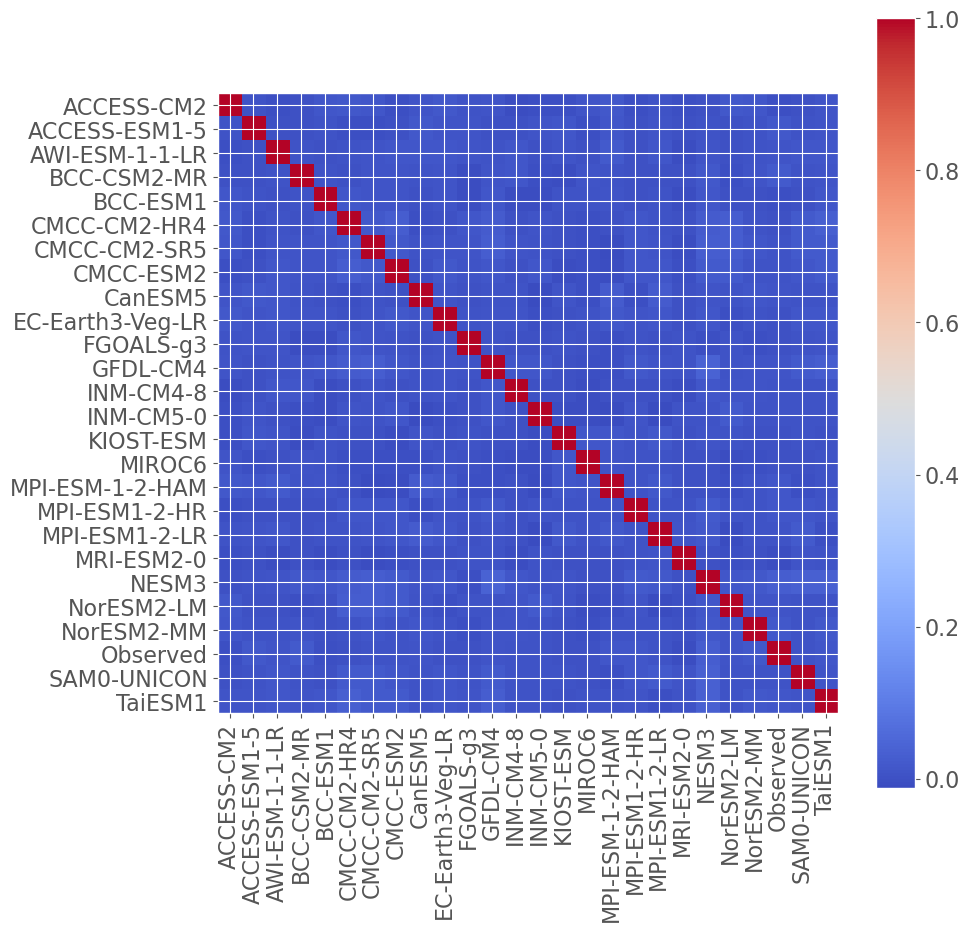

In [9]:
# Checking for correlation among diffent sensors

corr = train_data.corr()
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

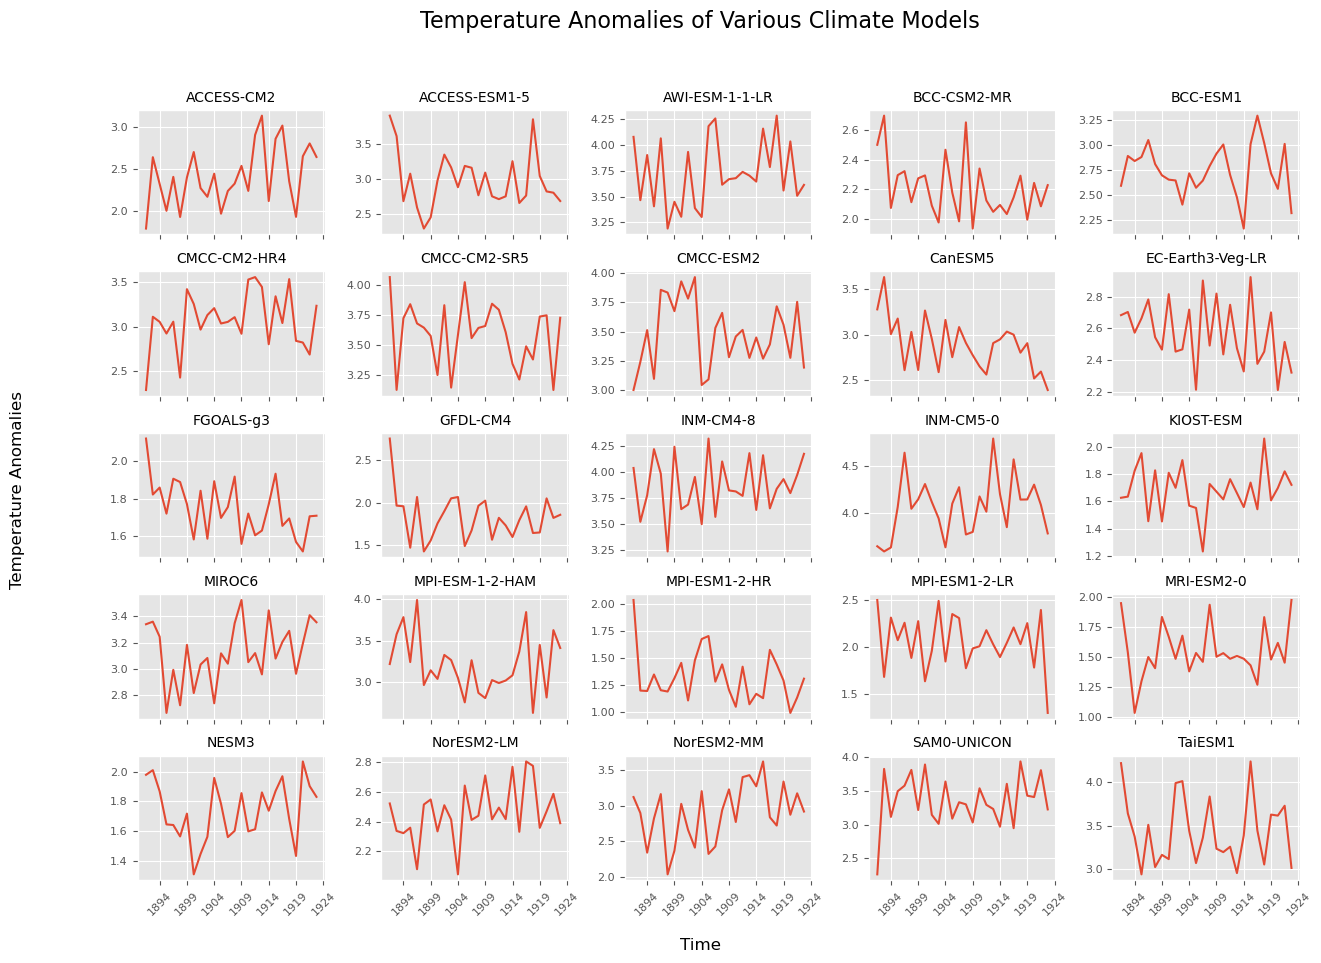

In [13]:
data = train_data.drop("Observed", axis=1).resample("5Y").mean()

xtick_labels = data.index.year.astype(str)

num_rows = int(np.ceil(np.sqrt(len(data.columns))))
num_cols = int(np.ceil(len(data.columns) / num_rows))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex=True)

axs = axs.flatten()

for i, column in enumerate(data.columns):
    axs[i].plot(data.index, data[column])
    axs[i].set_title(column, fontsize=10)
    axs[i].set_xticklabels(xtick_labels, rotation=45)
    axs[i].tick_params(axis='both', labelsize=8)

for i in range(len(data.columns), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("Temperature Anomalies of Various Climate Models", fontsize=16)
fig.text(0.5, 0.04, "Time", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Temperature Anomalies", va="center", rotation="vertical", fontsize=12)

fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


In [78]:
results = []

for col in test_data.columns:
    if col != 'Observed':
        rmse = mean_squared_error(test_data['Observed'], test_data[col], squared=False)
        results.append({'Model': col, 'MSE': rmse})

df_results = pd.DataFrame(results)

df_results

,Model,MSE
0,ACCESS-CM2,11.038999
1,ACCESS-ESM1-5,10.695305
2,AWI-ESM-1-1-LR,10.996616
3,BCC-CSM2-MR,10.761381
4,BCC-ESM1,10.615578
5,CMCC-CM2-HR4,10.643204
6,CMCC-CM2-SR5,11.480614
7,CMCC-ESM2,11.246493
8,CanESM5,11.151318
9,EC-Earth3-Veg-LR,10.453606


In [76]:
# RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_data.drop('Observed', axis=1), train_data['Observed'])
y_pred = model.predict(test_data.drop('Observed', axis=1))

In [85]:
# Calculate RMSE
rmse = mean_squared_error(test_data['Observed'], y_pred, squared=False)

print("RandomForestRegressor RMSE:", rmse)

RandomForestRegressor RMSE: 8.861007369235397


### Observations and Summary:

In terms of the EDA, there are few time series that are slightly negatively correlated as could be observed from the heat map. All the time series have very irregular oscillations without any major upward or downward trend. The mean value varies depending on the model around 1.5 to 3.0 units. 

When comparing the MSE for 25 different individual climate models and the random forest regressor model with RMSE of 8.861, the RMSE is smaller than the MSE for all the individual models. Therefore, it seems that the random forest regressor model is performing better than the individual climate models. In this case, the random forest regressor model may be benefiting from the diversity of the 25 individual models in the ensemble. Overall, it seems that the random forest regressor model is performing well in this particular context even though the difference is not very significant.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [86]:
X_train = train_data.drop("Observed", axis=1)
y_train = train_data["Observed"]
X_test = test_data.drop("Observed", axis=1)
y_test = test_data["Observed"]

In [87]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=123)

In [88]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.90
 Test RMSE: 8.66


In [89]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.